In [1]:
import sys
sys.path.insert(1, './functions/')
from fun_data import Data_calcium,imshow_data_c


# Generate calcium imaging data 

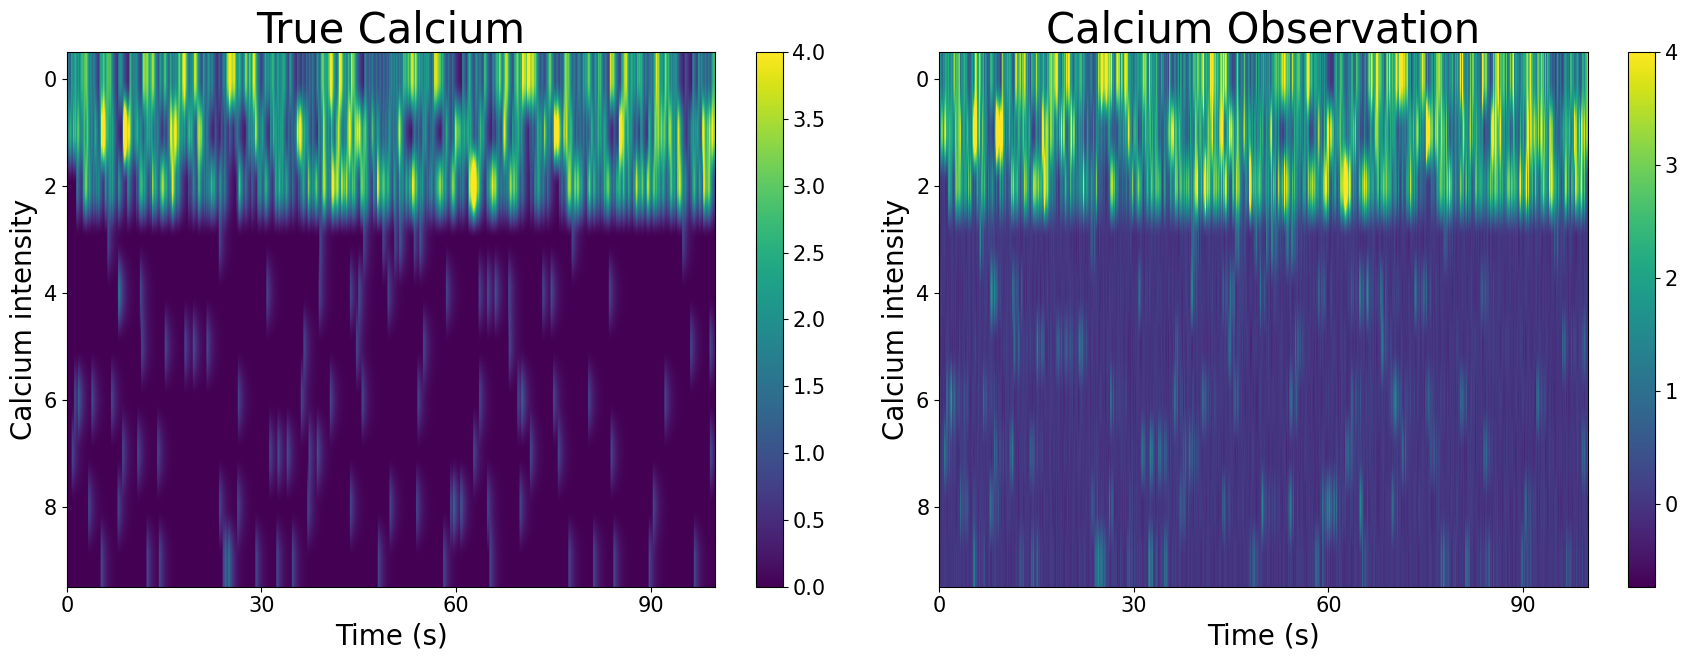

In [2]:
data= Data_calcium(n0=3, n1 = 7, T = 3000,firing_rate0=3,firing_rate1=0.15,frame_rate=30,
             poisson_rho = 0.8,gaussian_sn_kappa = 0.3, 
             y_b =0,seed = 13)
y,c,s=data.gen_data()
imshow_data_c(s,c,y, vmax = 4, xtick_s = True, figsize =(18,7),framerate = 30,xtickgap = 30)


### Method Description:

#### **Class: `Model`**  
**Attributes:**  
- `name`: Specifies the name of the model.



**Available model names:**  
- `'pca'`: Principal Component Analysis.  
- `'ppca'`: Probabilistic PCA.  
- `'fa'`: Factor Analysis.  
- `'bpca_common'`: Bayesian PCA (common variant).  
- `'bpca_individual'`: Bayesian PCA (individual variant).  
- `'dual_ard_common'`: Dual Automatic Relevance Determination (common variant).  
- `'dual_ard_individual'`: Dual ARD (individual variant).  



#### **Functions:**  

##### **`fit`**  
**Arguments:**  
- `y`: Input data to be modeled.  
- `D`: Dimensionality of the input data `y`.  
- `q`: Target dimensionality for dimensionality reduction.  
- `seed`: Random seed for reproducibility of results.  
- `returnQ`: Boolean indicating whether to return detailed model parameters from the variational Bayesian inference process.  
- `verbose`: Specifies the verbosity level for details in the variational Bayesian process (utilizes `bayepy`).  



##### **`imshow_wxyq`**  
Provides a visualization of weights and transformed dimensions.



##### **`plot_score_comparison`**  
Compares performance metrics across different configurations or settings. 

 # Applying the Model

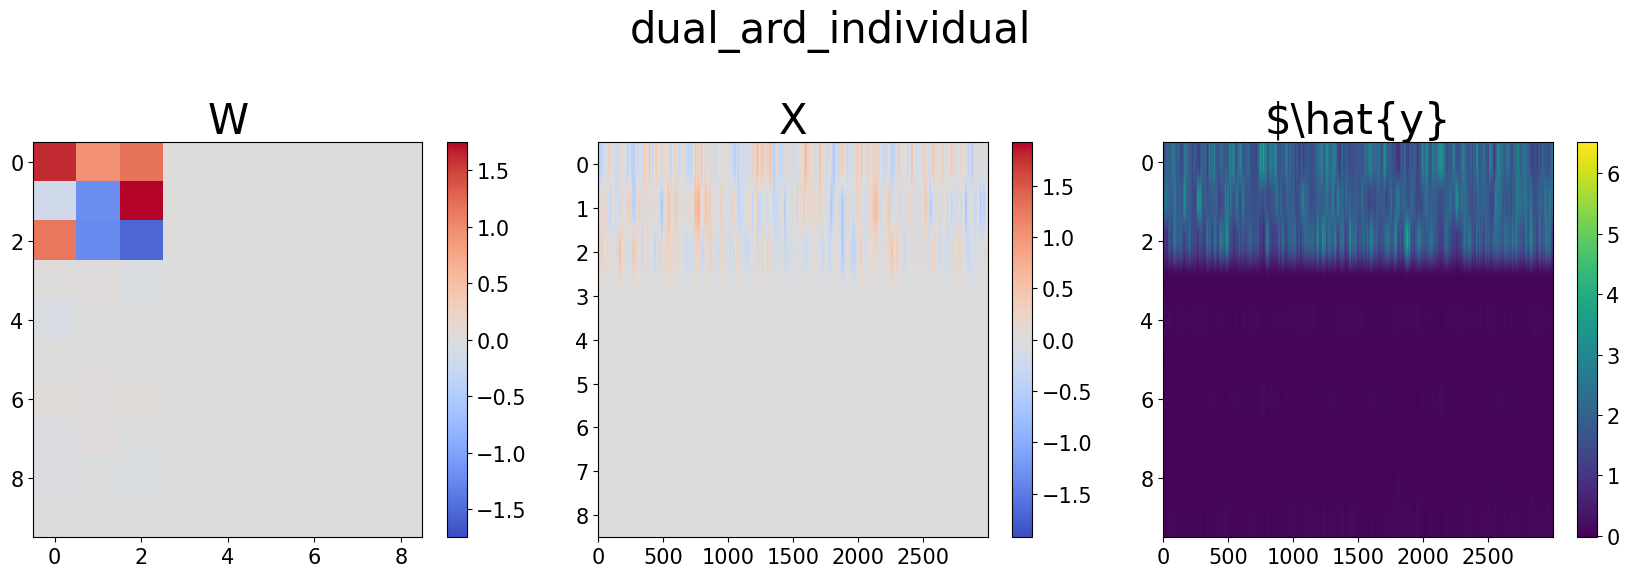

In [3]:
from fun_models_class import Model
model_name ='dual_ard_individual'
model = Model(name =model_name)
W, X, yq = model.fit(y, q = 3, verbose = False, seed = 13)
model.imshow_wxyq(figsize = (17,6))

### Method Description: 

#### **Class: `Models`**  
**Attributes:**  
- `model_names`: Names of the models.



#### **Functions:**  

##### **`fit`**  
**Arguments:**  
- `y`: Input data for modeling.  
- `q`: Target dimensionality for dimensionality reduction.  
- `z`: True signal for evaluation.  
- `score_names`: Metrics for comparing model performance.  
- `seed`: Random seed for ensuring reproducibility.  
- `returnQ`: Boolean flag to indicate whether detailed model parameters from the variational Bayesian inference process should be returned.  
- `verbose`: Specifies the verbosity level for variational Bayesian process details (utilizes `bayepy`).  
- `imshow_wxyq`: Visualizes the results for weights (`w`), latent variables (`x`), and reduced dimensions (`yq`).  


##### **`plot_score_comparison`**  
Generates a comparison of performance metrics across different configurations or model settings.  

## Applying Models

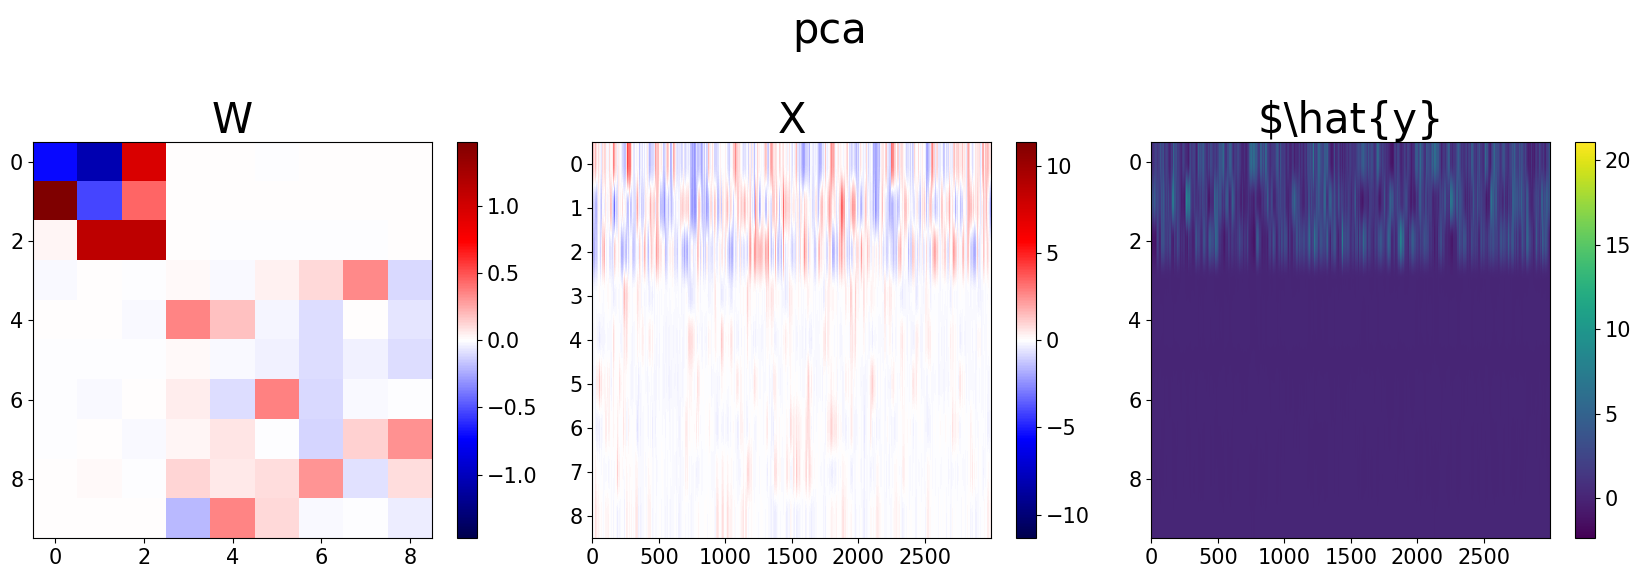

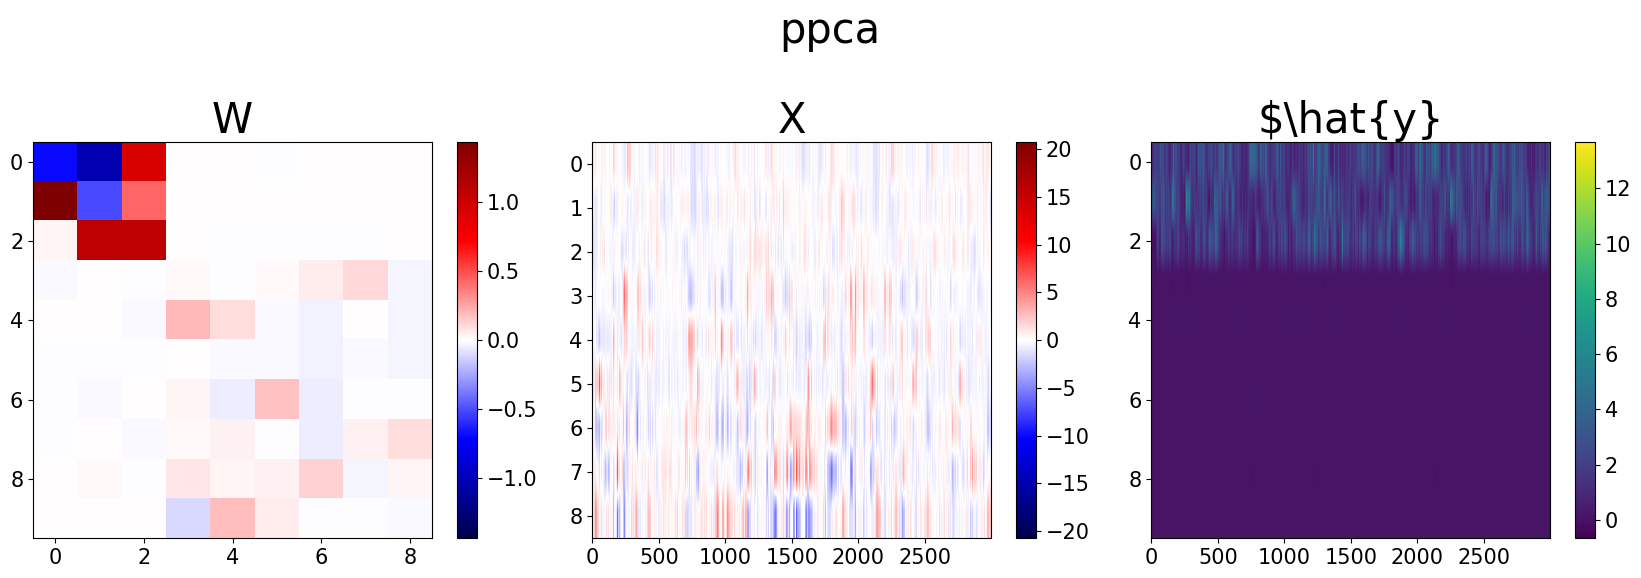

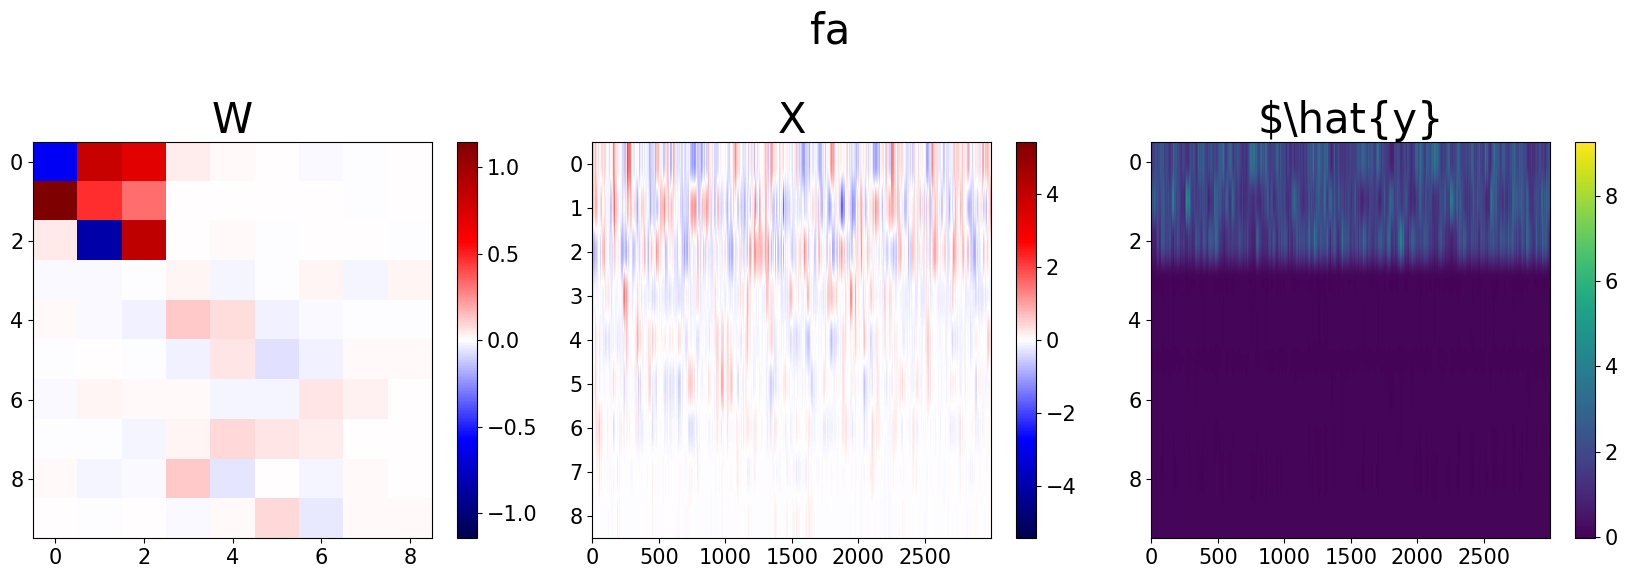

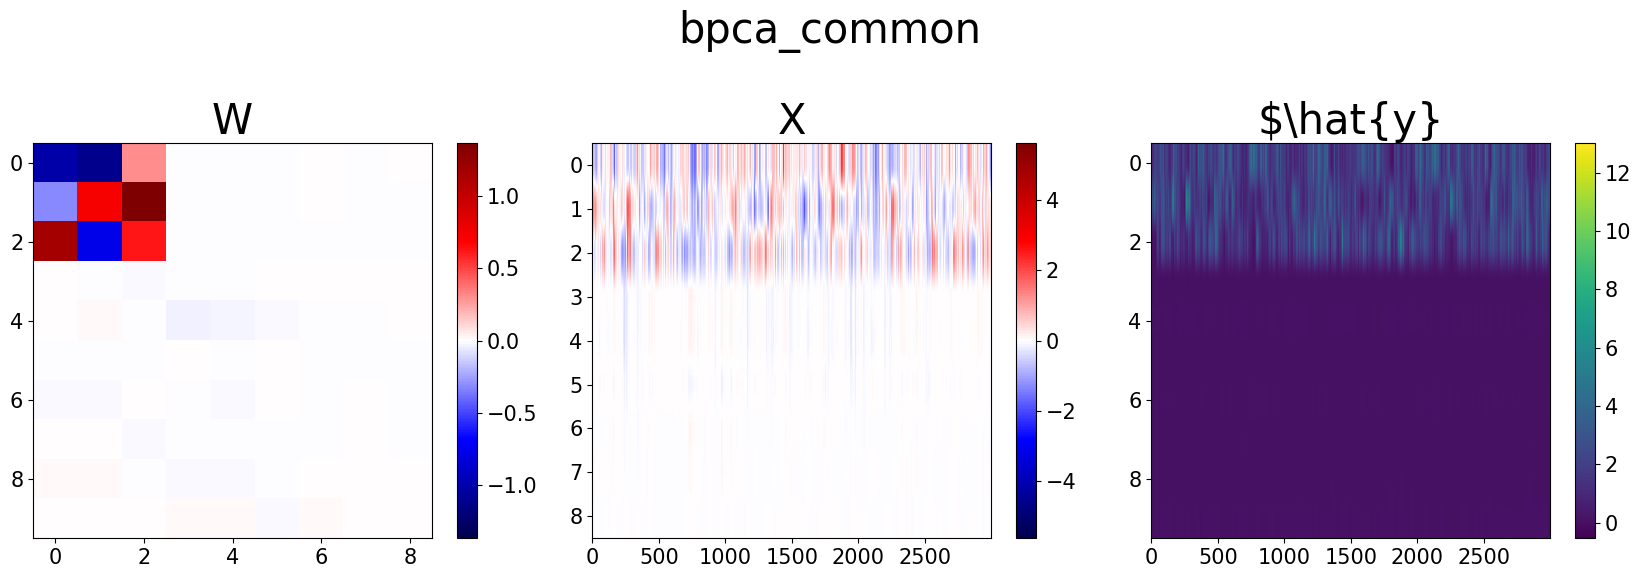

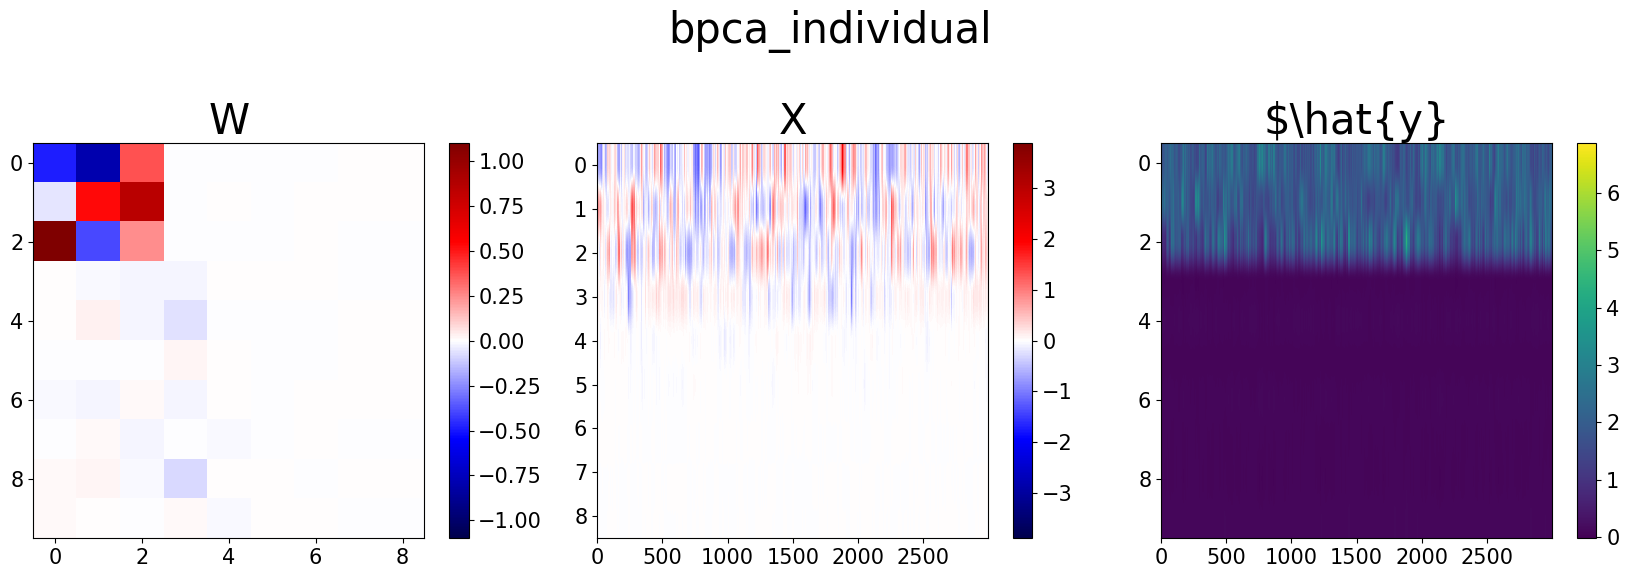

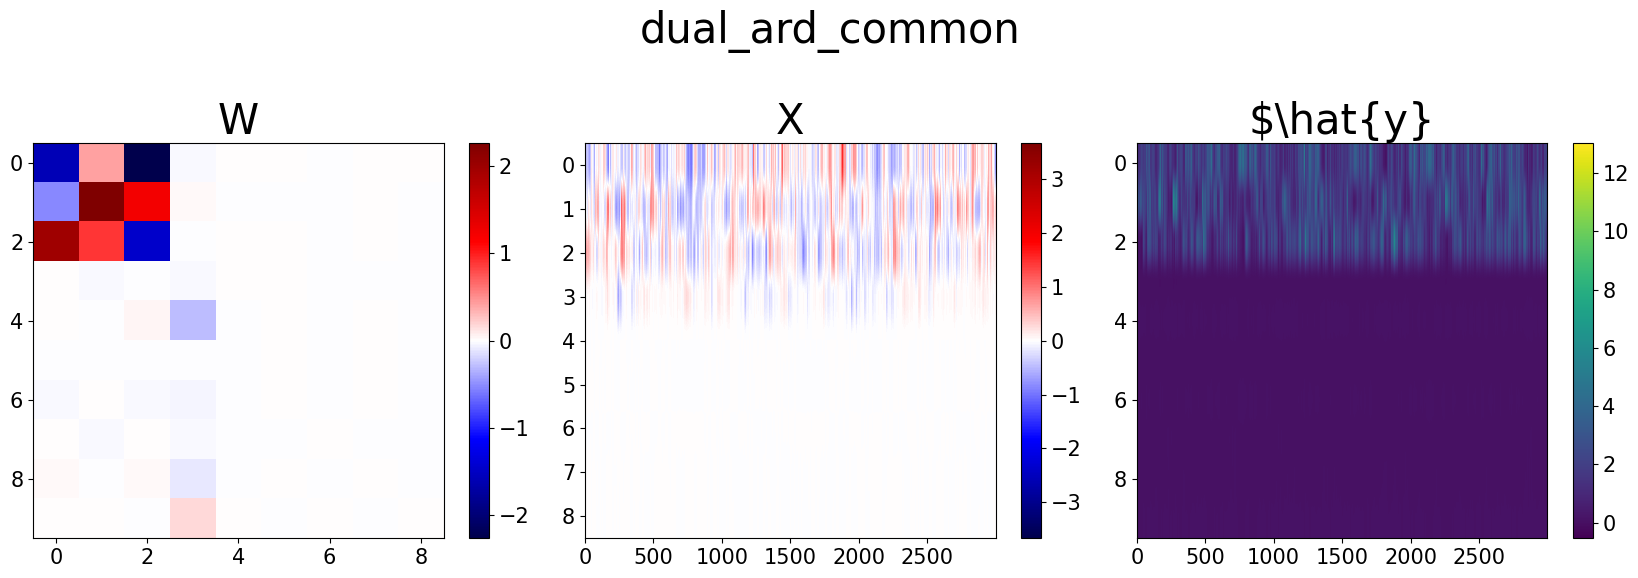

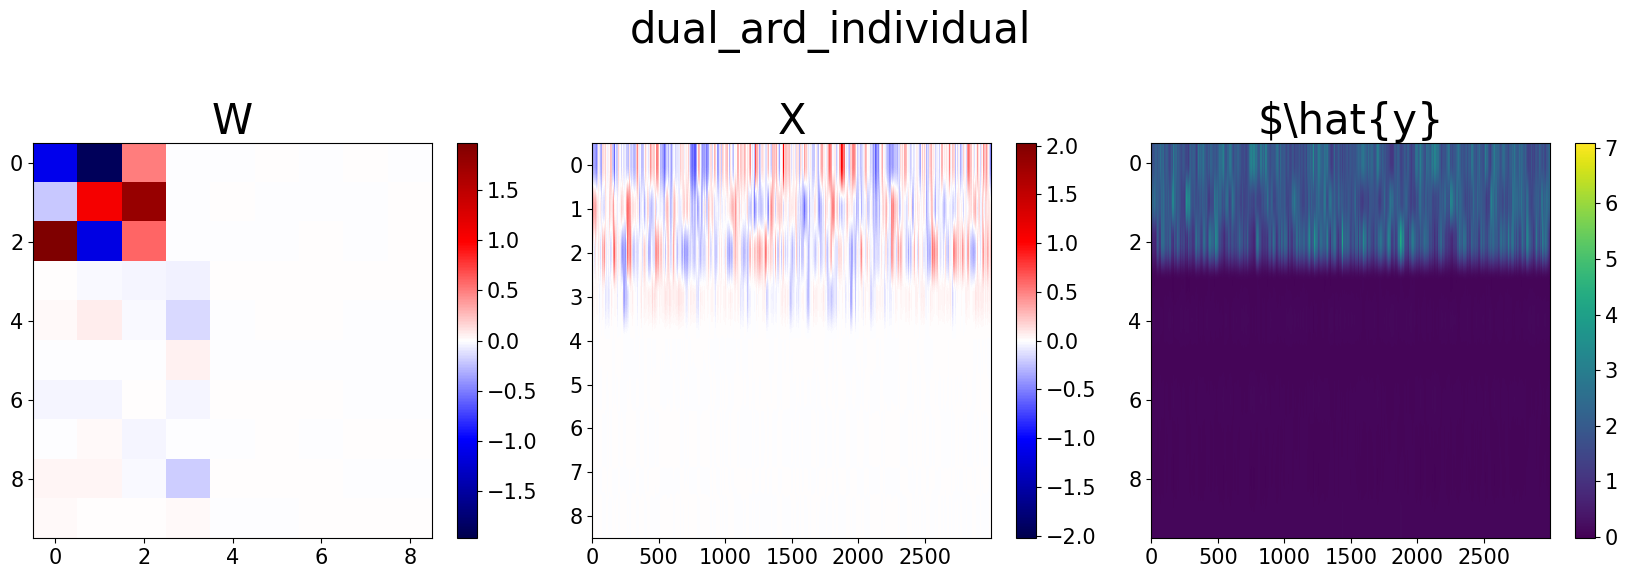

In [4]:
from fun_models_class import Models

model_names =['pca','ppca','fa','bpca_common','bpca_individual','dual_ard_common','dual_ard_individual']
score_names  = ['lb','log_like','evs','mse','r2','nef','evs_y', 'corr_z']
savepath = './figs/artificial_data_gaussian'
method_seed = 100
models = Models(model_names = model_names, savepath = savepath)
models_results = models.fit(y,q = 3, z = c,seed=method_seed, score_names = score_names,
                            imshow_wxyq = True,verbose = False,
                             nef_tol  = 1e-2)

# Plot model performance comparison 

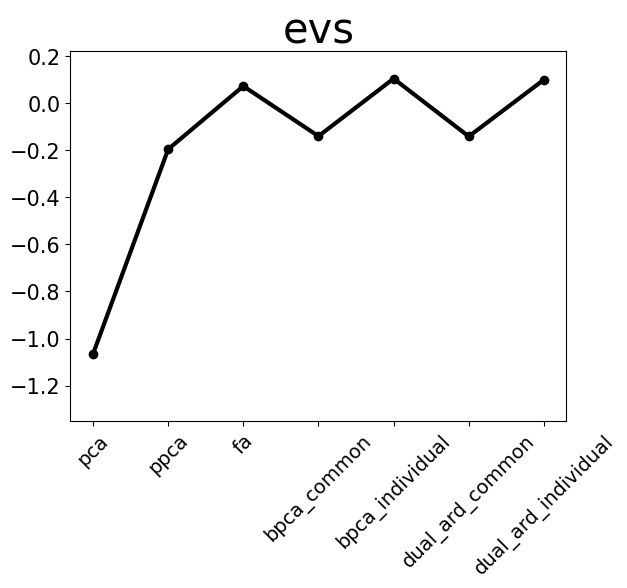

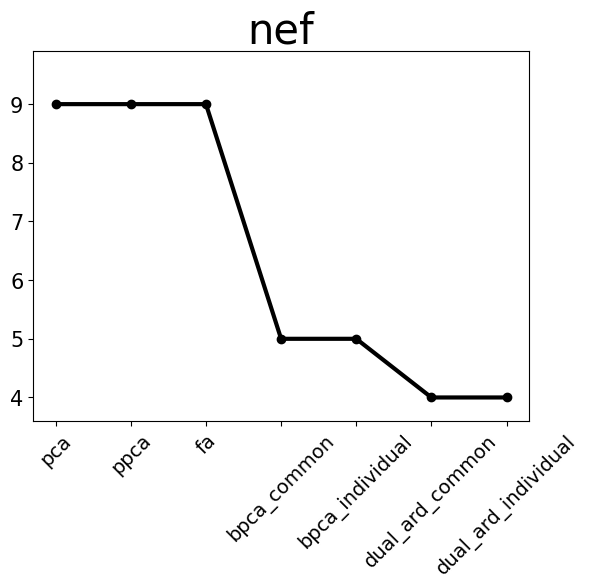

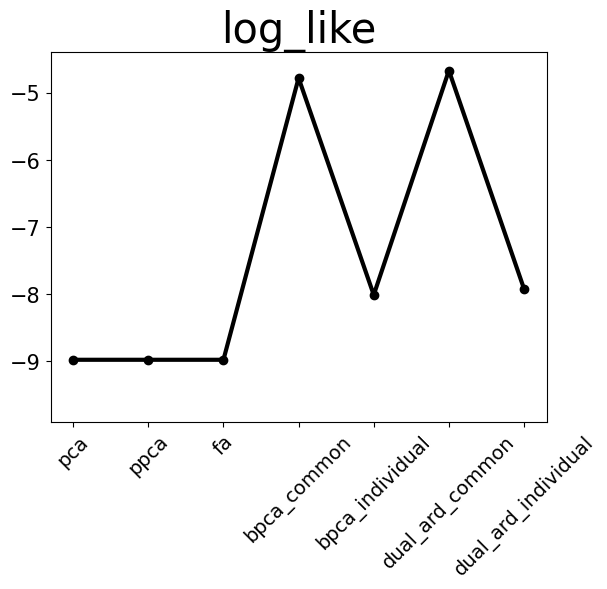

In [5]:
models.plot_score_comparsion(score_name='evs', ymin = -1.5, ymax =0.2)
models.plot_score_comparsion(score_name='nef', ymin = None, ymax =None)
models.plot_score_comparsion(score_name='log_like', ymin = -11, ymax =-4)